In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!gdown https://github.com/rpeden/cat-or-not/releases/download/1.0/data.zip

Downloading...
From: https://github.com/rpeden/cat-or-not/releases/download/1.0/data.zip
To: /content/data.zip
100% 267M/267M [00:01<00:00, 166MB/s]


In [3]:
import shutil
shutil.rmtree('./data')

FileNotFoundError: [Errno 2] No such file or directory: './data'

In [4]:
!unzip data.zip -d .

串流輸出內容已截斷至最後 5000 行。
  inflating: ./data/training_set/cats/cat.1601.jpg  
  inflating: ./data/training_set/cats/cat.1602.jpg  
  inflating: ./data/training_set/cats/cat.1603.jpg  
  inflating: ./data/training_set/cats/cat.1604.jpg  
  inflating: ./data/training_set/cats/cat.1605.jpg  
  inflating: ./data/training_set/cats/cat.1606.jpg  
  inflating: ./data/training_set/cats/cat.1607.jpg  
  inflating: ./data/training_set/cats/cat.1608.jpg  
  inflating: ./data/training_set/cats/cat.1609.jpg  
  inflating: ./data/training_set/cats/cat.161.jpg  
  inflating: ./data/training_set/cats/cat.1610.jpg  
  inflating: ./data/training_set/cats/cat.1611.jpg  
  inflating: ./data/training_set/cats/cat.1612.jpg  
  inflating: ./data/training_set/cats/cat.1613.jpg  
  inflating: ./data/training_set/cats/cat.1614.jpg  
  inflating: ./data/training_set/cats/cat.1615.jpg  
  inflating: ./data/training_set/cats/cat.1616.jpg  
  inflating: ./data/training_set/cats/cat.1617.jpg  
  inflating: ./data/traini

In [5]:
ls data/*

data/test_set:
cats/  notcats/

data/training_set:
cats/  notcats/


In [6]:
img_width, img_height = 224, 224
train_data_dir = './data/training_set'
#train_data_dir = os.path.join(os.getcwd(), 'test')
validation_data_dir = './data/test_set'
nb_train_samples = 1000
nb_validation_samples = 1000
epochs = 5
batch_size = 200
input_shape = (img_height, img_width, 3)
num_classes = 2 # 類別個數

In [7]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [8]:
#Create your own input format (here 224x224x3)
input = Input(shape=(img_width, img_height,3),name = 'image_input')

In [9]:
#Use the generated model
output_vgg16_conv = model_vgg16_conv(input)

In [10]:
#Add the fully-connected layers
x = Flatten(name='flatten')(output_vgg16_conv)
#x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)
#x = Dense(2, activation='sigmoid')(x)

In [11]:
#Create your own model
model = Model(inputs=input, outputs=x)

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    rotation_range = 0.2, # 旋轉
    shear_range=0.2, # 裁剪
    zoom_range=0.2,  # 放大/縮小
    horizontal_flip=False) # 水平翻轉

In [14]:
SAVE_PATH="./data/train1"
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False, # 不放回抽樣
    # color_mode="grayscale", # no of channel = 1
    # save_to_dir=SAVE_PATH, # save to file
    class_mode='categorical')

Found 5668 images belonging to 2 classes.


In [15]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False, # 不放回抽樣
    # color_mode="grayscale", # no of channel = 1
    #save_to_dir=SAVE_PATH,
    class_mode='categorical')

Found 2665 images belonging to 2 classes.


In [16]:
train_history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
5/5 [==============================] - 147s 10s/step - loss: 6.8400 - accuracy: 0.6120 - val_loss: 0.0158 - val_accuracy: 0.9940
Epoch 2/5
5/5 [==============================] - 43s 9s/step - loss: 5.8678 - accuracy: 0.5710 - val_loss: 0.8117 - val_accuracy: 0.3940
Epoch 3/5
5/5 [==============================] - 42s 9s/step - loss: 0.6589 - accuracy: 0.6150 - val_loss: 0.2682 - val_accuracy: 0.9920
Epoch 4/5
5/5 [==============================] - 44s 9s/step - loss: 1.2858 - accuracy: 0.2690 - val_loss: 1.0851 - val_accuracy: 0.0870
Epoch 5/5
5/5 [==============================] - 77s 18s/step - loss: 1.0434 - accuracy: 0.2143 - val_loss: 0.6586 - val_accuracy: 0.6450


In [21]:
img_path = './data/training_set/cats/cat.1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x1 = image.img_to_array(img)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)

labels=['cat', 'dog']
predictions = model.predict(x1)
print('predict class:', labels[np.argmax(predictions)])
print('predict:', predictions.ravel())


1/1 [==============================] - 0s 21ms/step
predict class: dog
predict: [0.49471498 0.50528497]


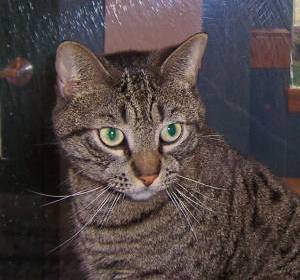

In [23]:
from IPython.display import Image
Image(img_path)